## Group Number: 9
## Names: Aaryan, Sanika, Neelakshi 
## Project Name: VPN Classification

In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
root_path = '/content/drive/MyDrive/Colab Notebooks/CS513/'

In [5]:
data = pd.read_parquet(root_path+"train.parq")
data.head()

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:exploit,0,6466,0
1,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:spam,0,6466,0
2,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:bruteforce,2,4637,0
3,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:spam,2,4637,0
4,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:exploit,2,4637,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61629685 entries, 0 to 61629684
Data columns (total 11 columns):
 #   Column             Dtype              
---  ------             -----              
 0   attack_time        datetime64[ns, UTC]
 1   watcher_country    category           
 2   watcher_as_num     float32            
 3   watcher_as_name    category           
 4   attacker_country   category           
 5   attacker_as_num    float32            
 6   attacker_as_name   category           
 7   attack_type        category           
 8   watcher_uuid_enum  int32              
 9   attacker_ip_enum   int32              
 10  label              int8               
dtypes: category(5), datetime64[ns, UTC](1), float32(2), int32(2), int8(1)
memory usage: 2.0 GB


In [ ]:
# Unique values and their frequencies for categorical columns
categorical_columns = ['watcher_country', 'attacker_country', 'attacker_as_name', 'attack_type']
for column in categorical_columns:
    print(data[column].value_counts())
    print()

## Data Visualization

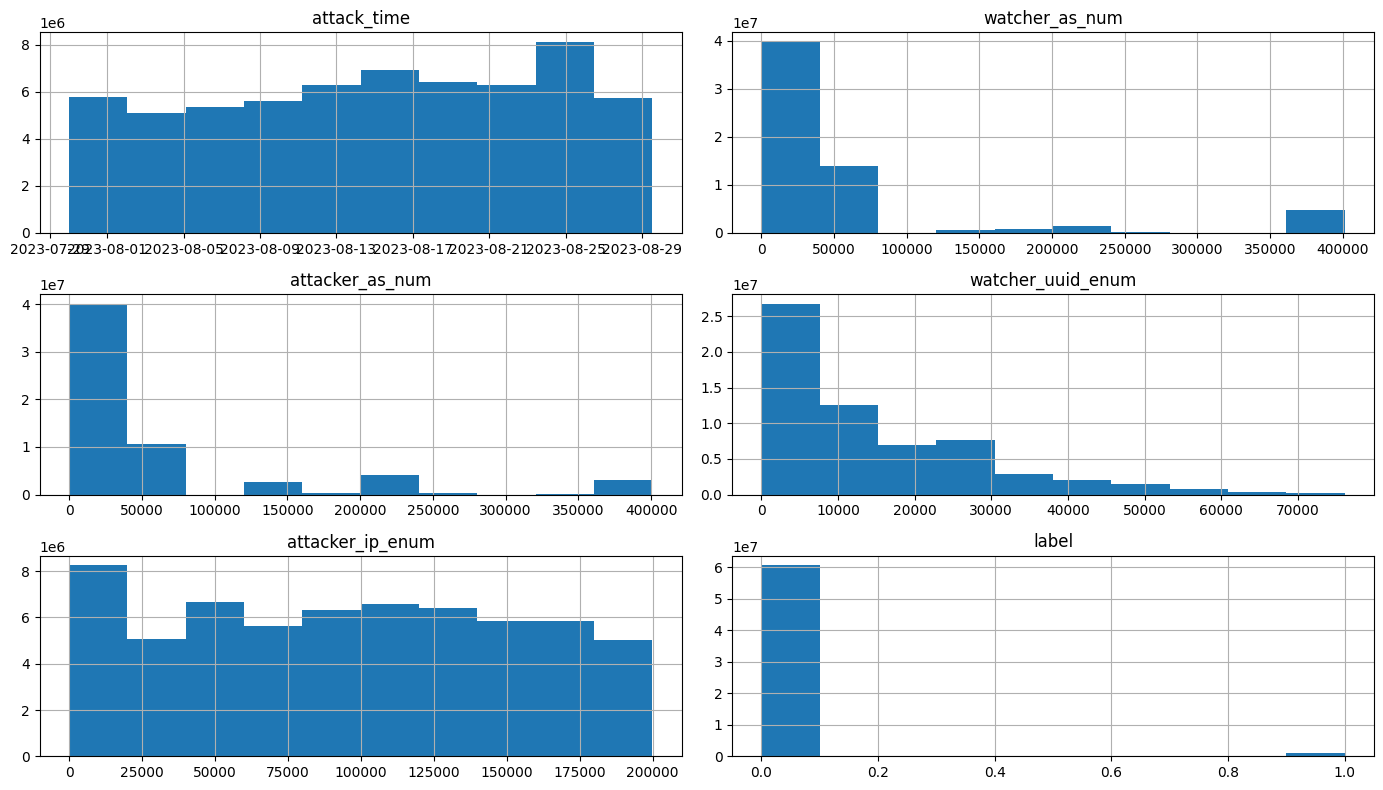

In [19]:
# Histogram for numerical columns
data.hist(figsize=(14, 8))
plt.tight_layout()
plt.show()

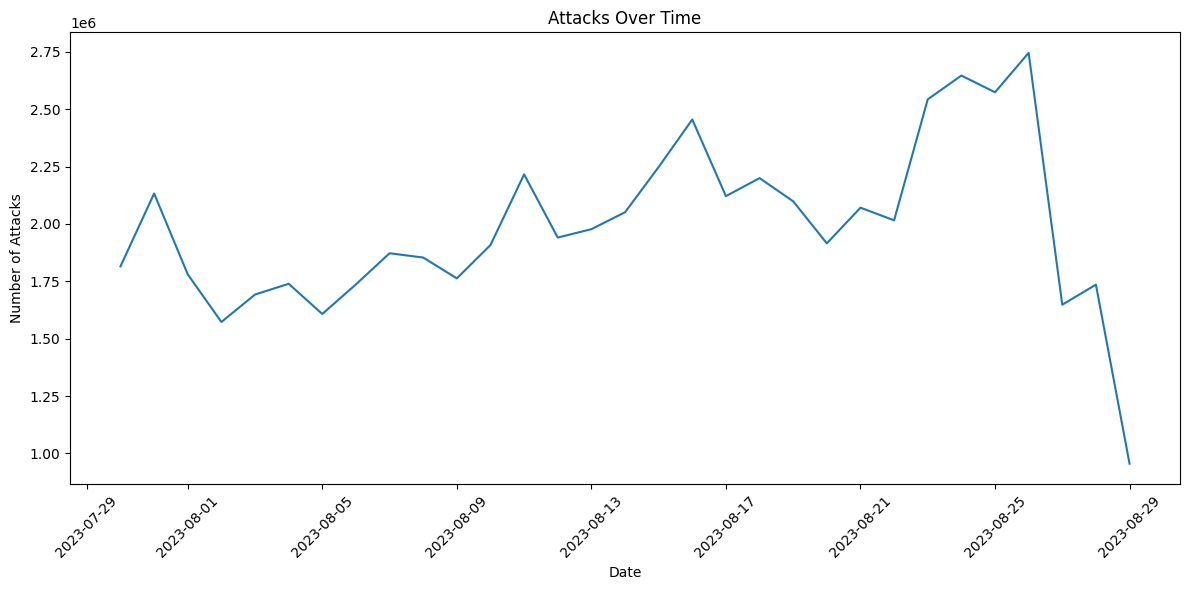

In [21]:
# Time-based analysis (if 'attack_time' is a timestamp)
data['attack_time'] = pd.to_datetime(data['attack_time'])
data['attack_date'] = data['attack_time'].dt.date

plt.figure(figsize=(12, 6))
data.groupby('attack_date').size().plot()
plt.title('Attacks Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


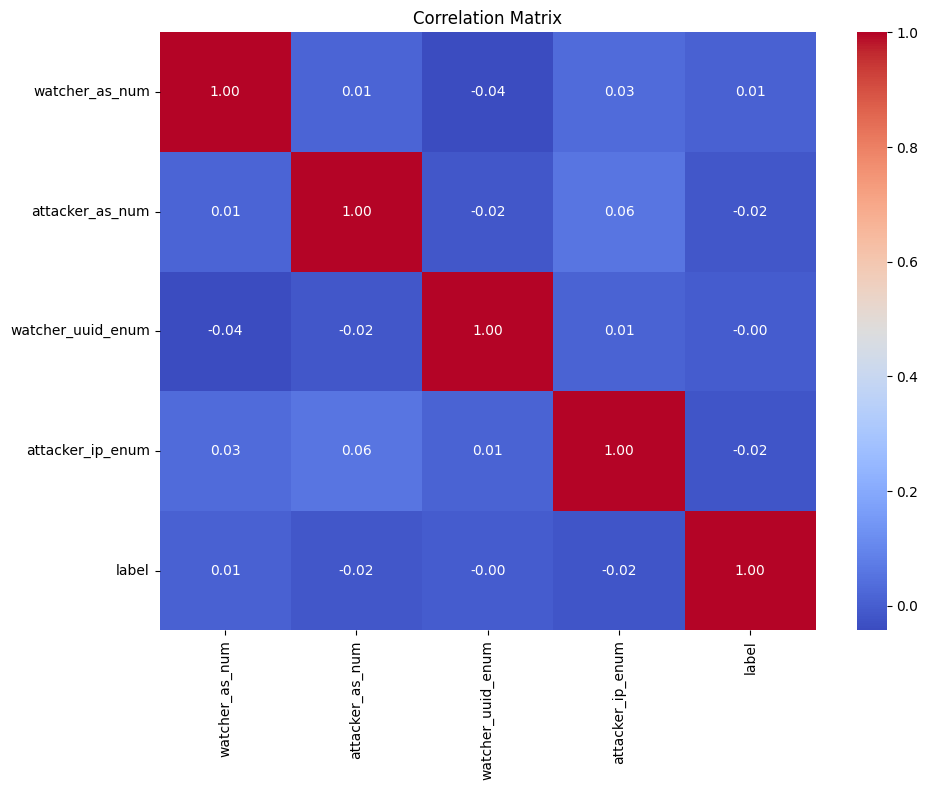

In [6]:
# Correlation matrix

numeric_columns = data.select_dtypes(include=['number']).columns.tolist()
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


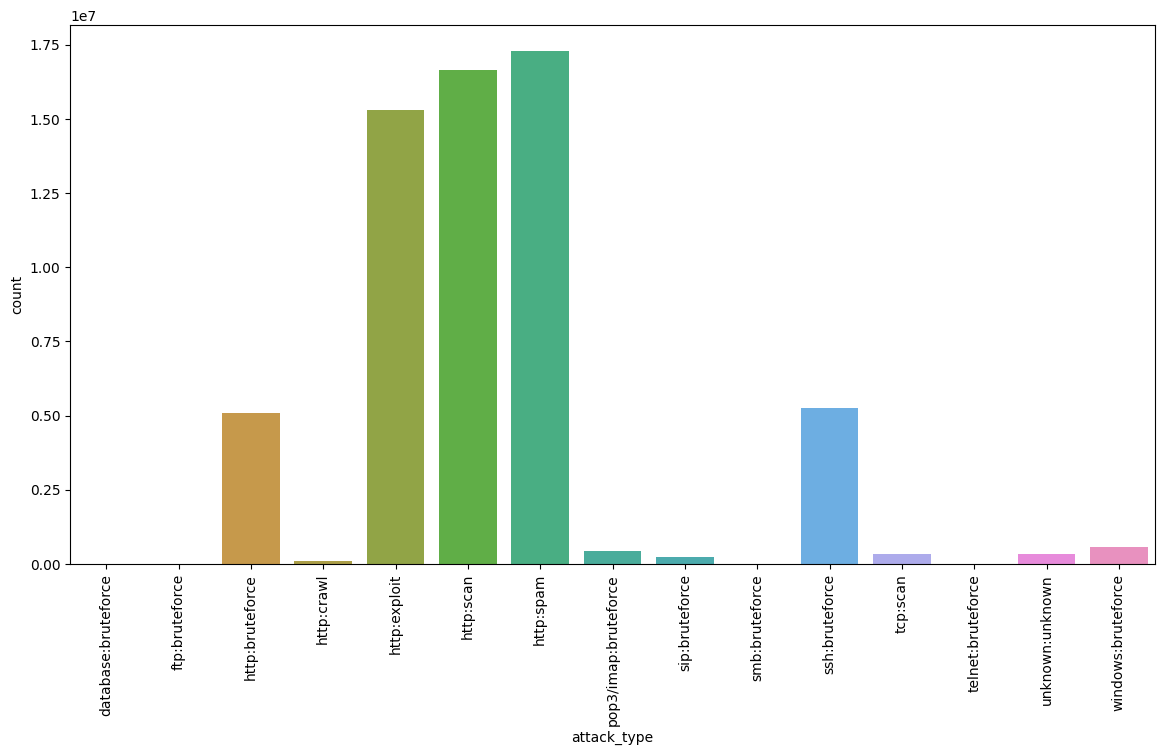

In [17]:
_ = plt.figure(figsize=(14, 7))
_ = sns.countplot(x=data["attack_type"])
_ = plt.xticks(rotation=90)
plt.show()

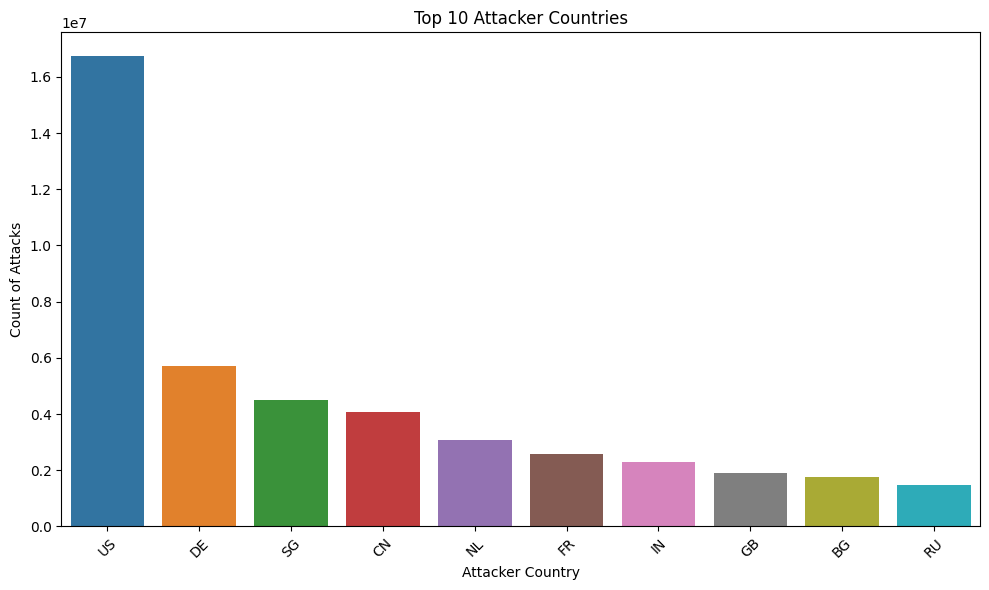

In [25]:
# Plotting the count of attacks for the top 10 countries

top_countries = data['attacker_country'].value_counts().head(10).index.tolist()

# Filter the data to include only the top 10 countries
data_top_countries = data[data['attacker_country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.countplot(x=data_top_countries["attacker_country"], order=top_countries)
plt.xticks(rotation=45)
plt.title('Top 10 Attacker Countries')
plt.xlabel('Attacker Country')
plt.ylabel('Count of Attacks')
plt.tight_layout()
plt.show()